In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
from matplotlib import rc
from matplotlib.ticker import MaxNLocator

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica Neue'], 'size':30})
rc('text', usetex=False)


In [2]:
f1 = np.load('errpred_1draw_100cal/distances.bin.npz')
L1 = f1['arr_0'][:, :]

f2 = np.load('errpred_2draw_100cal/distances.bin.npz')
L2 = f2['arr_0'][:, :]

L = L1

In [3]:
p = np.load('../ocs_points_basic.npy')

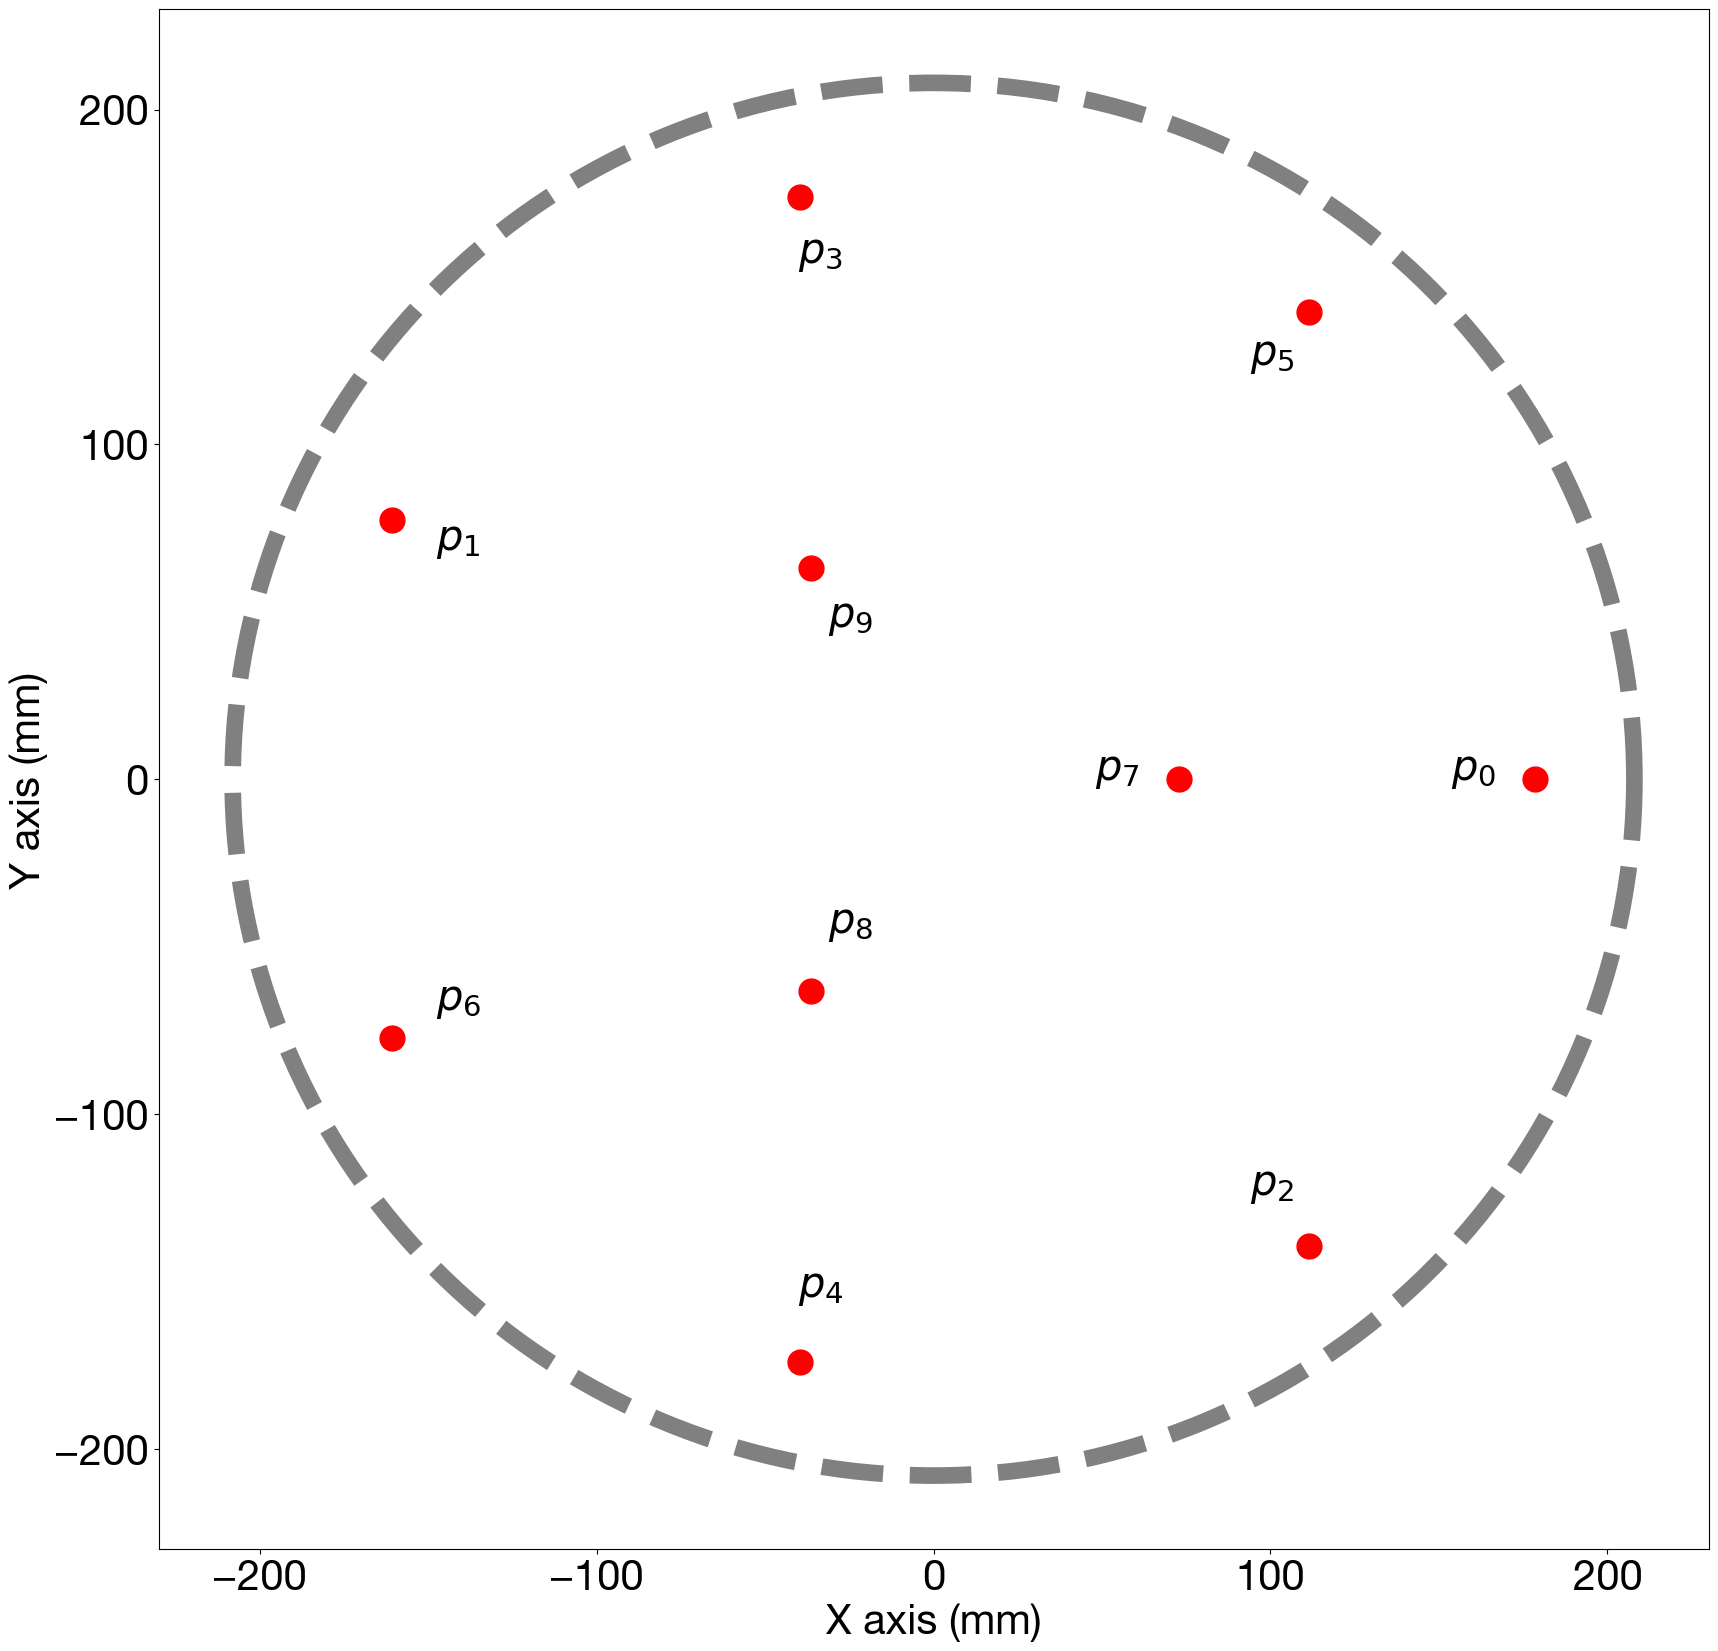

In [4]:
plt.figure(figsize = (20, 20))
SEP = 20
OFF_X = 5
plt.gca().add_patch(matplotlib.patches.Arc((0, 0), 416, 416, linewidth = 12, color = 'gray', linestyle = 'dashed'))
for i in range(len(p)):
    x = p[i, 0]
    y = p[i, 1]
    dist = np.sqrt(x**2 + y**2)
    dx = x / dist
    dy = y / dist
    
    plt.scatter(p[i, 0] * 1e3, p[i, 1] * 1e3, 320, label = fr'{i}', color = 'red')
    plt.text(p[i, 0] * 1e3 - SEP * dx - OFF_X, p[i, 1] * 1e3 - SEP * dy, fr'$p_{{{i}}}$')
    
plt.xlim([-230, 230])
plt.ylim([-230, 230])
plt.xlabel('X axis (mm)')
plt.ylabel('Y axis (mm)')
plt.savefig('ocs_points_basic.svg',bbox_inches='tight')

Text(0, 0.5, 'Y axis (mm)')

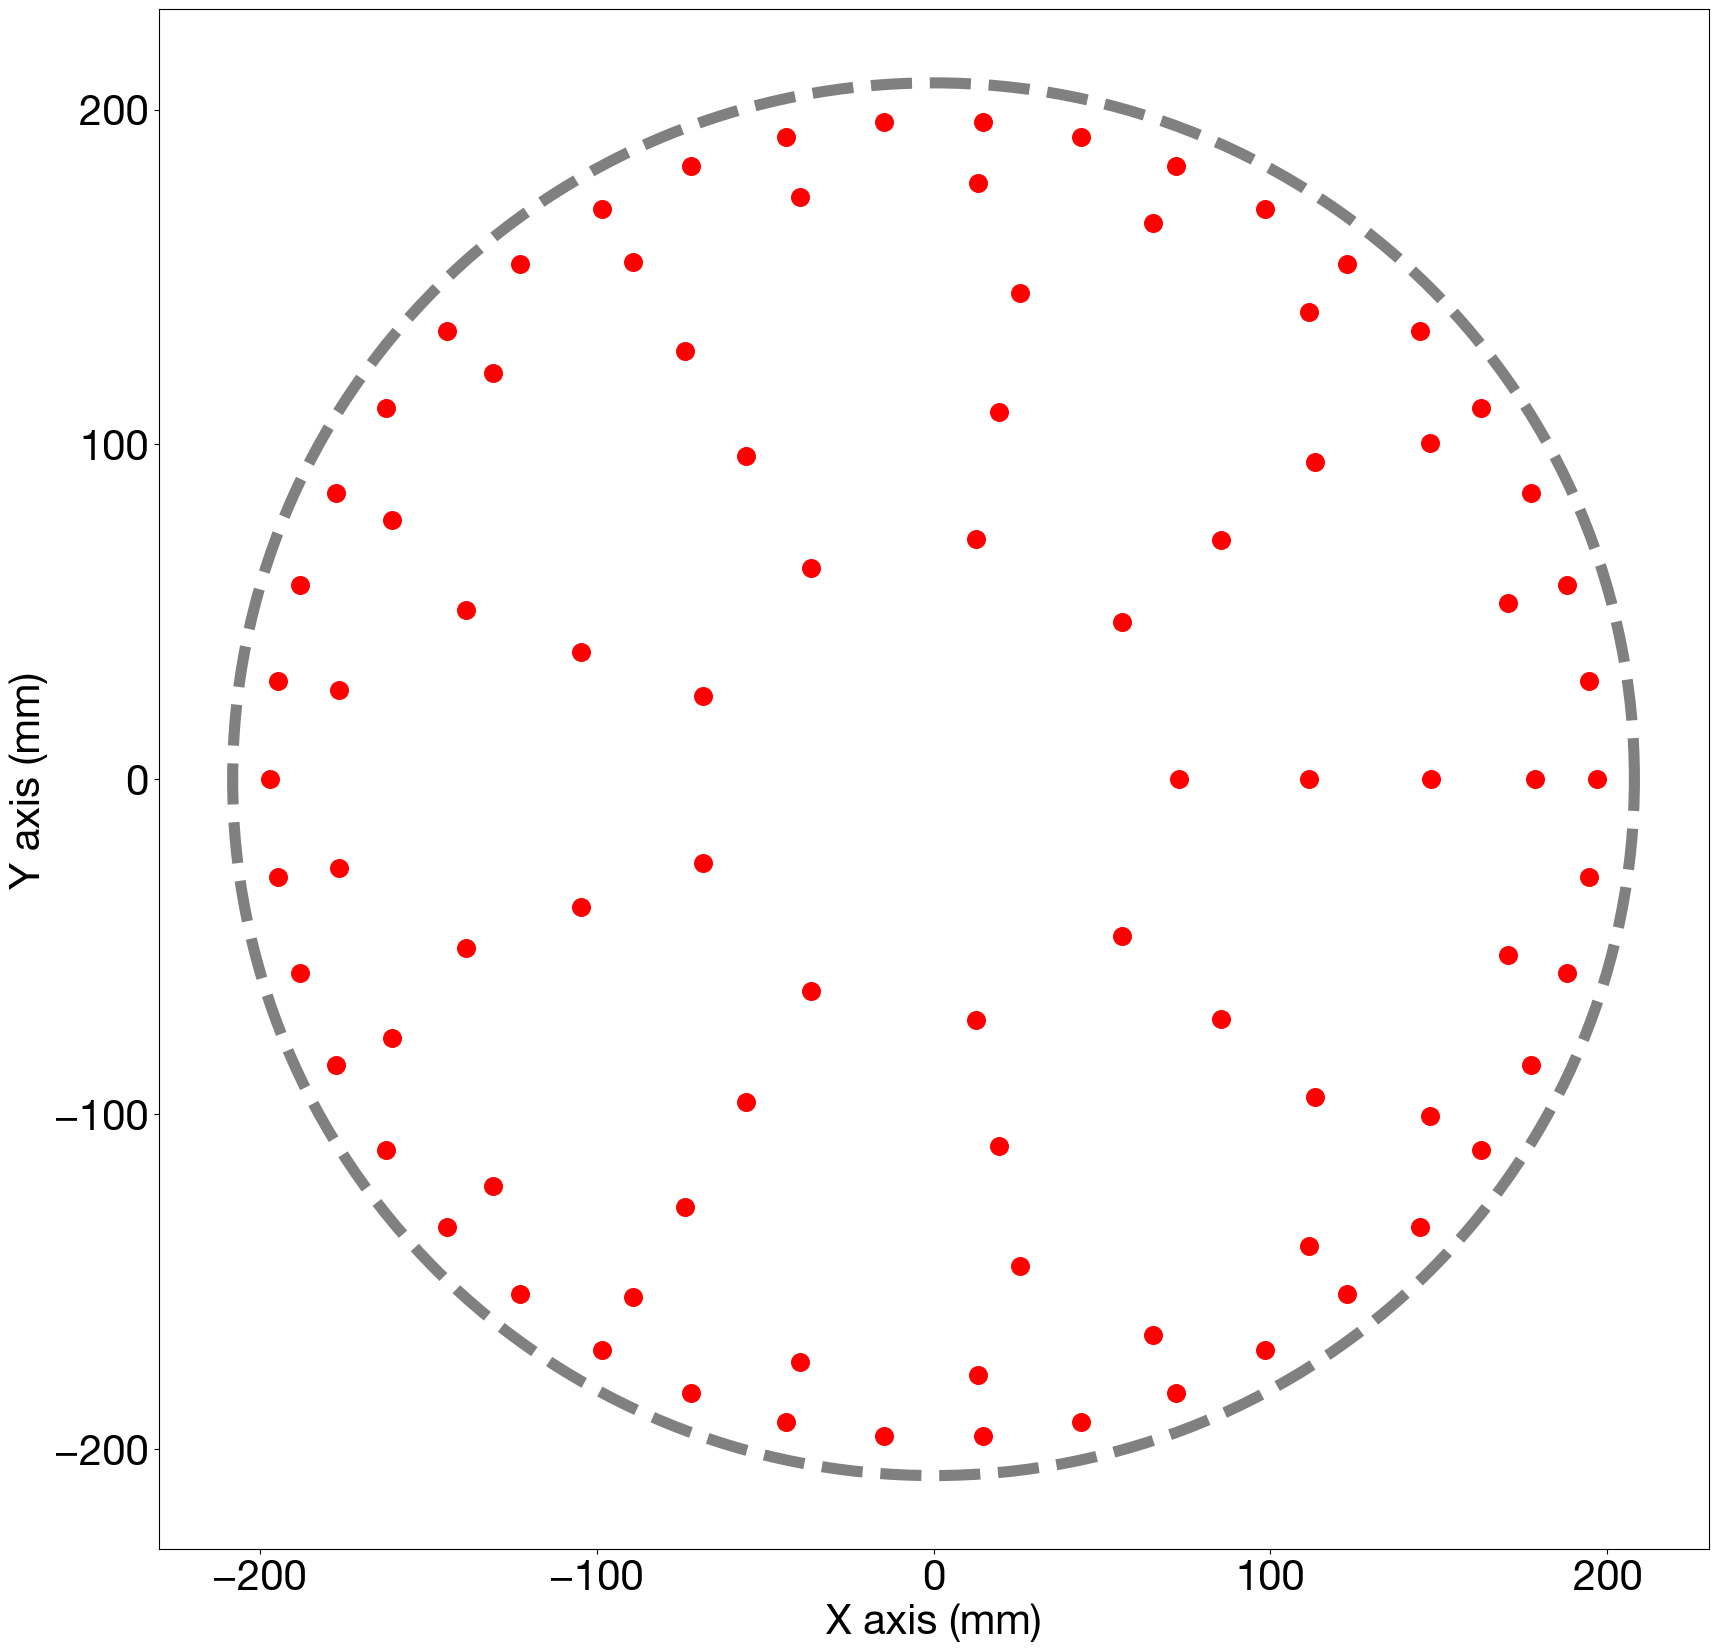

In [5]:
p_2 = np.load('../ocs_points_redundant.npy')
plt.figure(figsize = (20, 20))
SEP = 15
OFF_X = 5
plt.gca().add_patch(matplotlib.patches.Arc((0, 0), 416, 416, linewidth = 8, color = 'gray', linestyle = 'dashed'))
for i in range(len(p_2)):
    x = p_2[i, 0]
    y = p_2[i, 1]
    dist = np.sqrt(x**2 + y**2)
    dx = x / dist
    dy = y / dist
    
    plt.scatter(p_2[i, 0] * 1e3, p_2[i, 1] * 1e3, 160, label = fr'{i}', color = 'red')
    # plt.text(p_2[i, 0] * 1e3 - SEP * dx - OFF_X, p_2[i, 1] * 1e3 - SEP * dy, fr'$p_{{{i}}}$')
    
plt.xlim([-230, 230])
plt.ylim([-230, 230])
plt.xlabel('X axis (mm)')
plt.ylabel('Y axis (mm)')

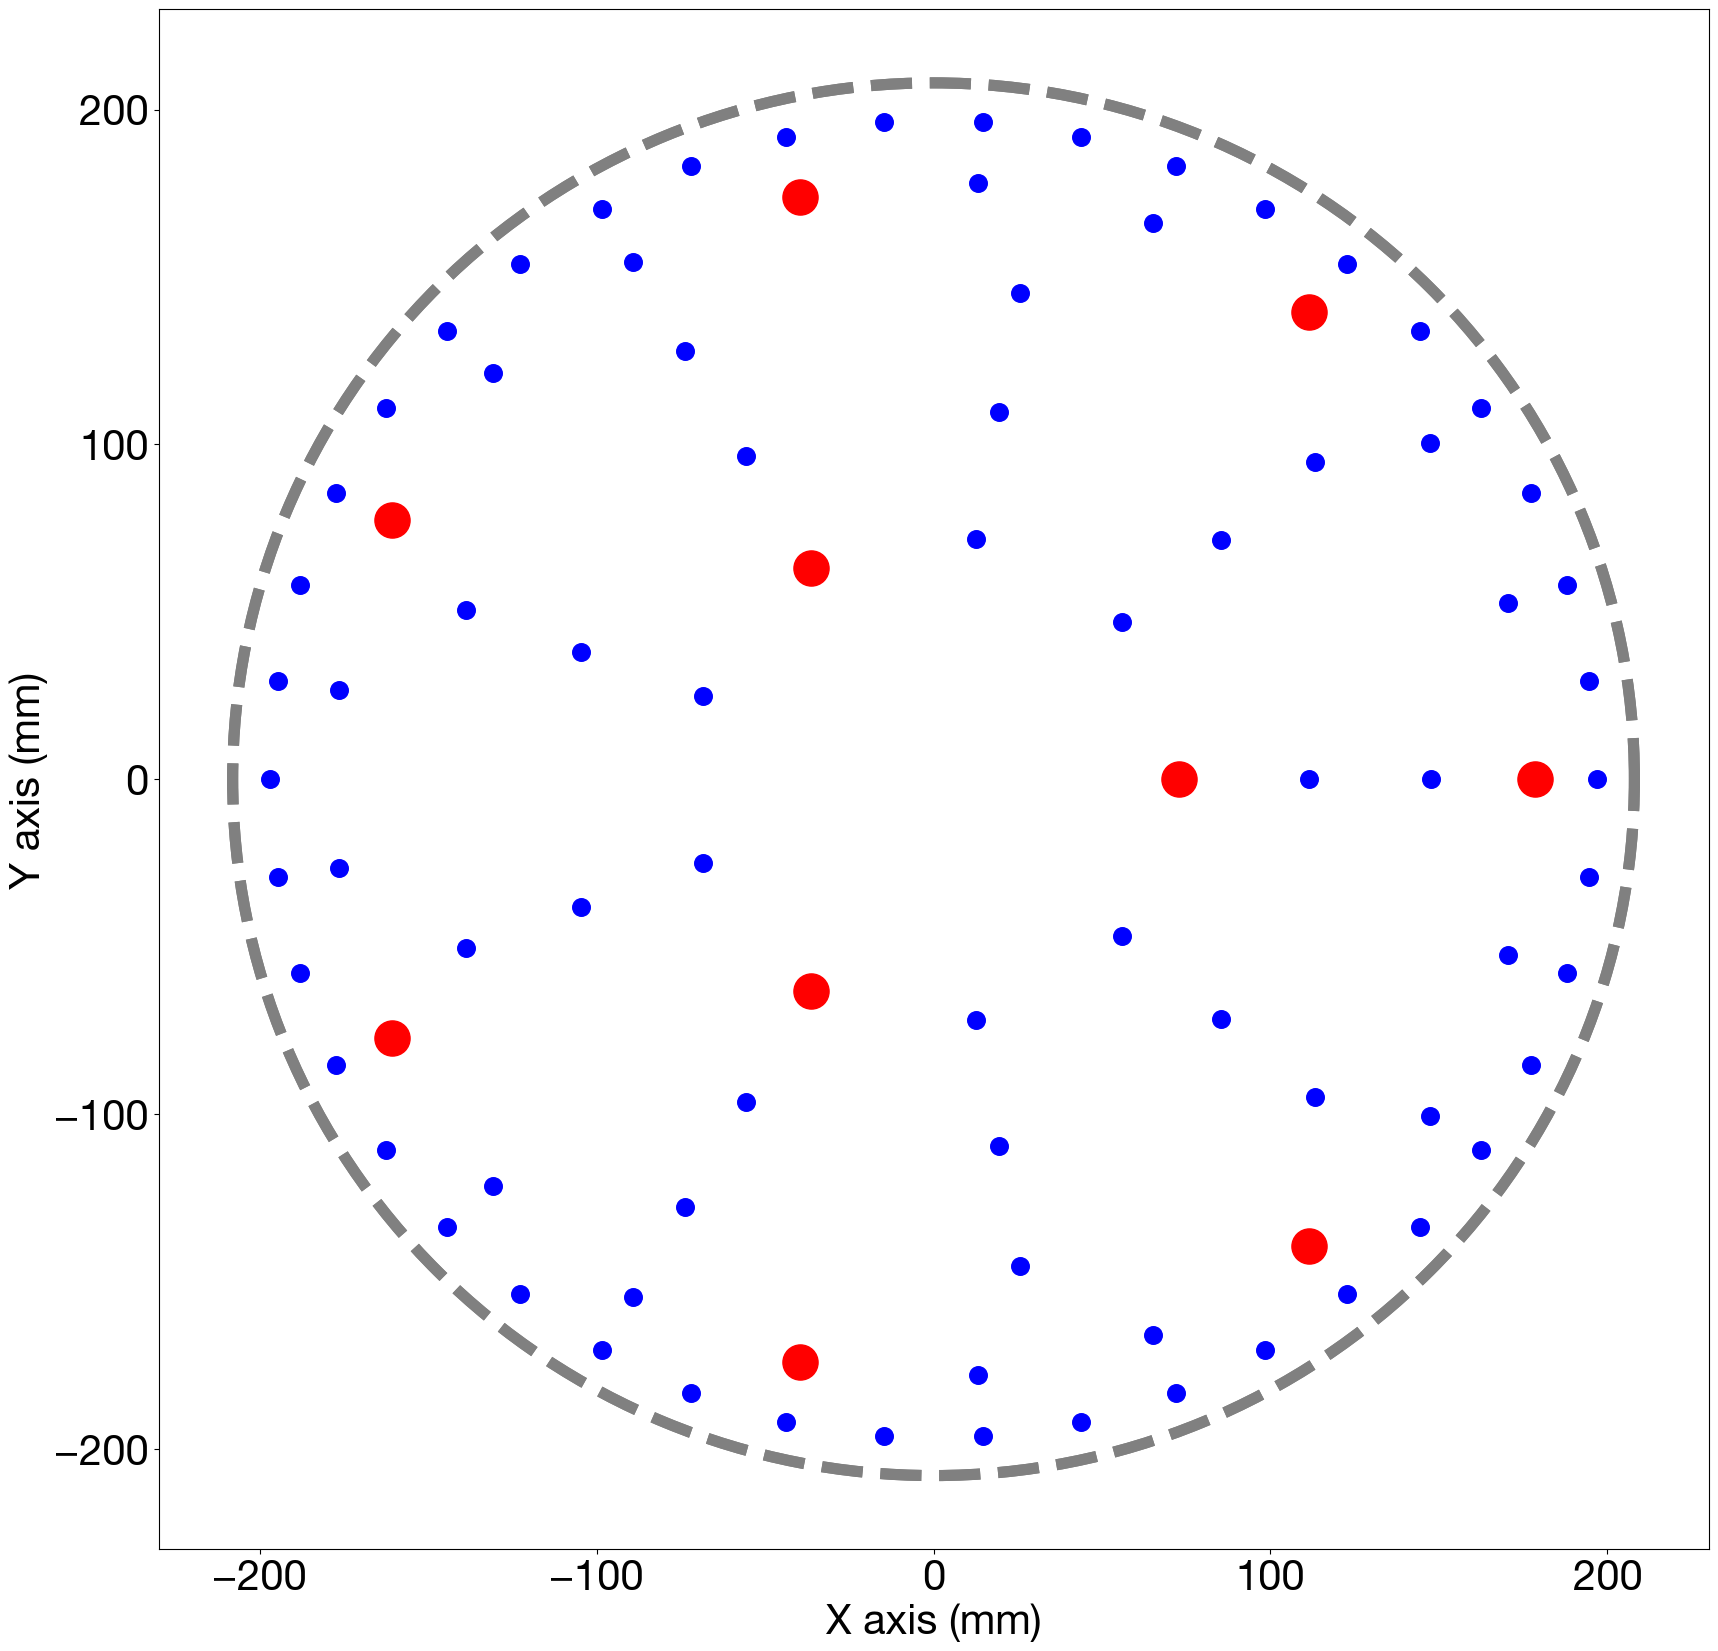

In [6]:
p_2 = np.load('../ocs_points_redundant.npy')
plt.figure(figsize = (20, 20))
SEP = 15
OFF_X = 5
plt.gca().add_patch(matplotlib.patches.Arc((0, 0), 416, 416, linewidth = 8, color = 'gray', linestyle = 'dashed'))
for i in range(len(p_2)):
    x = p_2[i, 0]
    y = p_2[i, 1]
    dist = np.sqrt(x**2 + y**2)
    dx = x / dist
    dy = y / dist
    
    plt.scatter(p_2[i, 0] * 1e3, p_2[i, 1] * 1e3, 160, label = fr'{i}', color = 'blue')
    # plt.text(p_2[i, 0] * 1e3 - SEP * dx - OFF_X, p_2[i, 1] * 1e3 - SEP * dy, fr'$p_{{{i}}}$')
    
    
p_2 = np.load('../ocs_points_basic.npy')
SEP = 15
OFF_X = 5
plt.gca().add_patch(matplotlib.patches.Arc((0, 0), 416, 416, linewidth = 8, color = 'gray', linestyle = 'dashed'))
for i in range(len(p_2)):
    x = p_2[i, 0]
    y = p_2[i, 1]
    dist = np.sqrt(x**2 + y**2)
    dx = x / dist
    dy = y / dist
    
    plt.scatter(p_2[i, 0] * 1e3, p_2[i, 1] * 1e3, 640, label = fr'{i}', color = 'red')
    # plt.text(p_2[i, 0] * 1e3 - SEP * dx - OFF_X, p_2[i, 1] * 1e3 - SEP * dy, fr'$p_{{{i}}}$')
    
plt.xlim([-230, 230])
plt.ylim([-230, 230])
plt.xlabel('X axis (mm)')
plt.ylabel('Y axis (mm)')
plt.savefig('ocs_points_redundant.svg',bbox_inches='tight')

In [7]:
def make_plots(L):
    fig, ax = plt.subplots(5, 2, figsize = (20, 40))
    r = range(0, 10000)

    std = np.sqrt(L[:, 0, :] * 1e12)
    res = (L[:, 1, :] * 1e6)
    XLIM = -5
    YLIM = 0.7
    for N in range(10):
        row = N // 2
        col = N % 2

        y, x, _ = ax[row, col].hist(res[r, N] / std[r, N], 100, density = True, label = 'Observed')
        ss      = np.linspace(-XLIM, XLIM, 1000)
        norm    = stats.norm.pdf(ss, loc = 0, scale = 1)
        _ = ax[row, col].plot(ss, norm, label = r'$N(\mu = 0, \sigma = 1)$', linewidth = 5)
        ax[row, col].set_xlabel(fr'$r_{"x" if col == 0 else "y"}$')
        ax[row, col].set_title(fr'Residual at $p_{{{N // 2}}}$, {"X" if col == 0 else "Y"} axis ($\bar{{\sigma}}$ = {np.mean(std[:, N]):.2f} µm)')
        ax[row, col].set_xlim([-XLIM, XLIM])
        ax[row, col].set_ylim([0, YLIM])
        ax[row, col].legend()
    plt.tight_layout()

#plt.xlim([.2, .56])

In [8]:
def make_overlay(L):
    plt.figure(figsize=(20, 10))
    for N in range(10, 100):
        row = N // 2
        col = N % 2
        std = np.sqrt(L[:, 0, :] * 1e12)
        res = (L[:, 1, :] * 1e6)

        y, x = np.histogram(res[:, N] / std[:, N], 100, density = True)
        x = .5 * (x[0:-1] + x[1:])
        plt.plot(x, y, color = (0, 0, 0, .075), linewidth = 5)

    ss      = np.linspace(-4, 4, 1000)
    norm    = stats.norm.pdf(ss, loc = 0, scale = 1)
    plt.plot(ss, norm, label = r'$N(\mu = 0, \sigma = 1)$', linewidth = 5)
    plt.xlabel(fr'$r$, single-axis')
    plt.title(fr'Residual at $p_{0}-p_{{89}}$, normalised')
    plt.legend()
    plt.tight_layout()


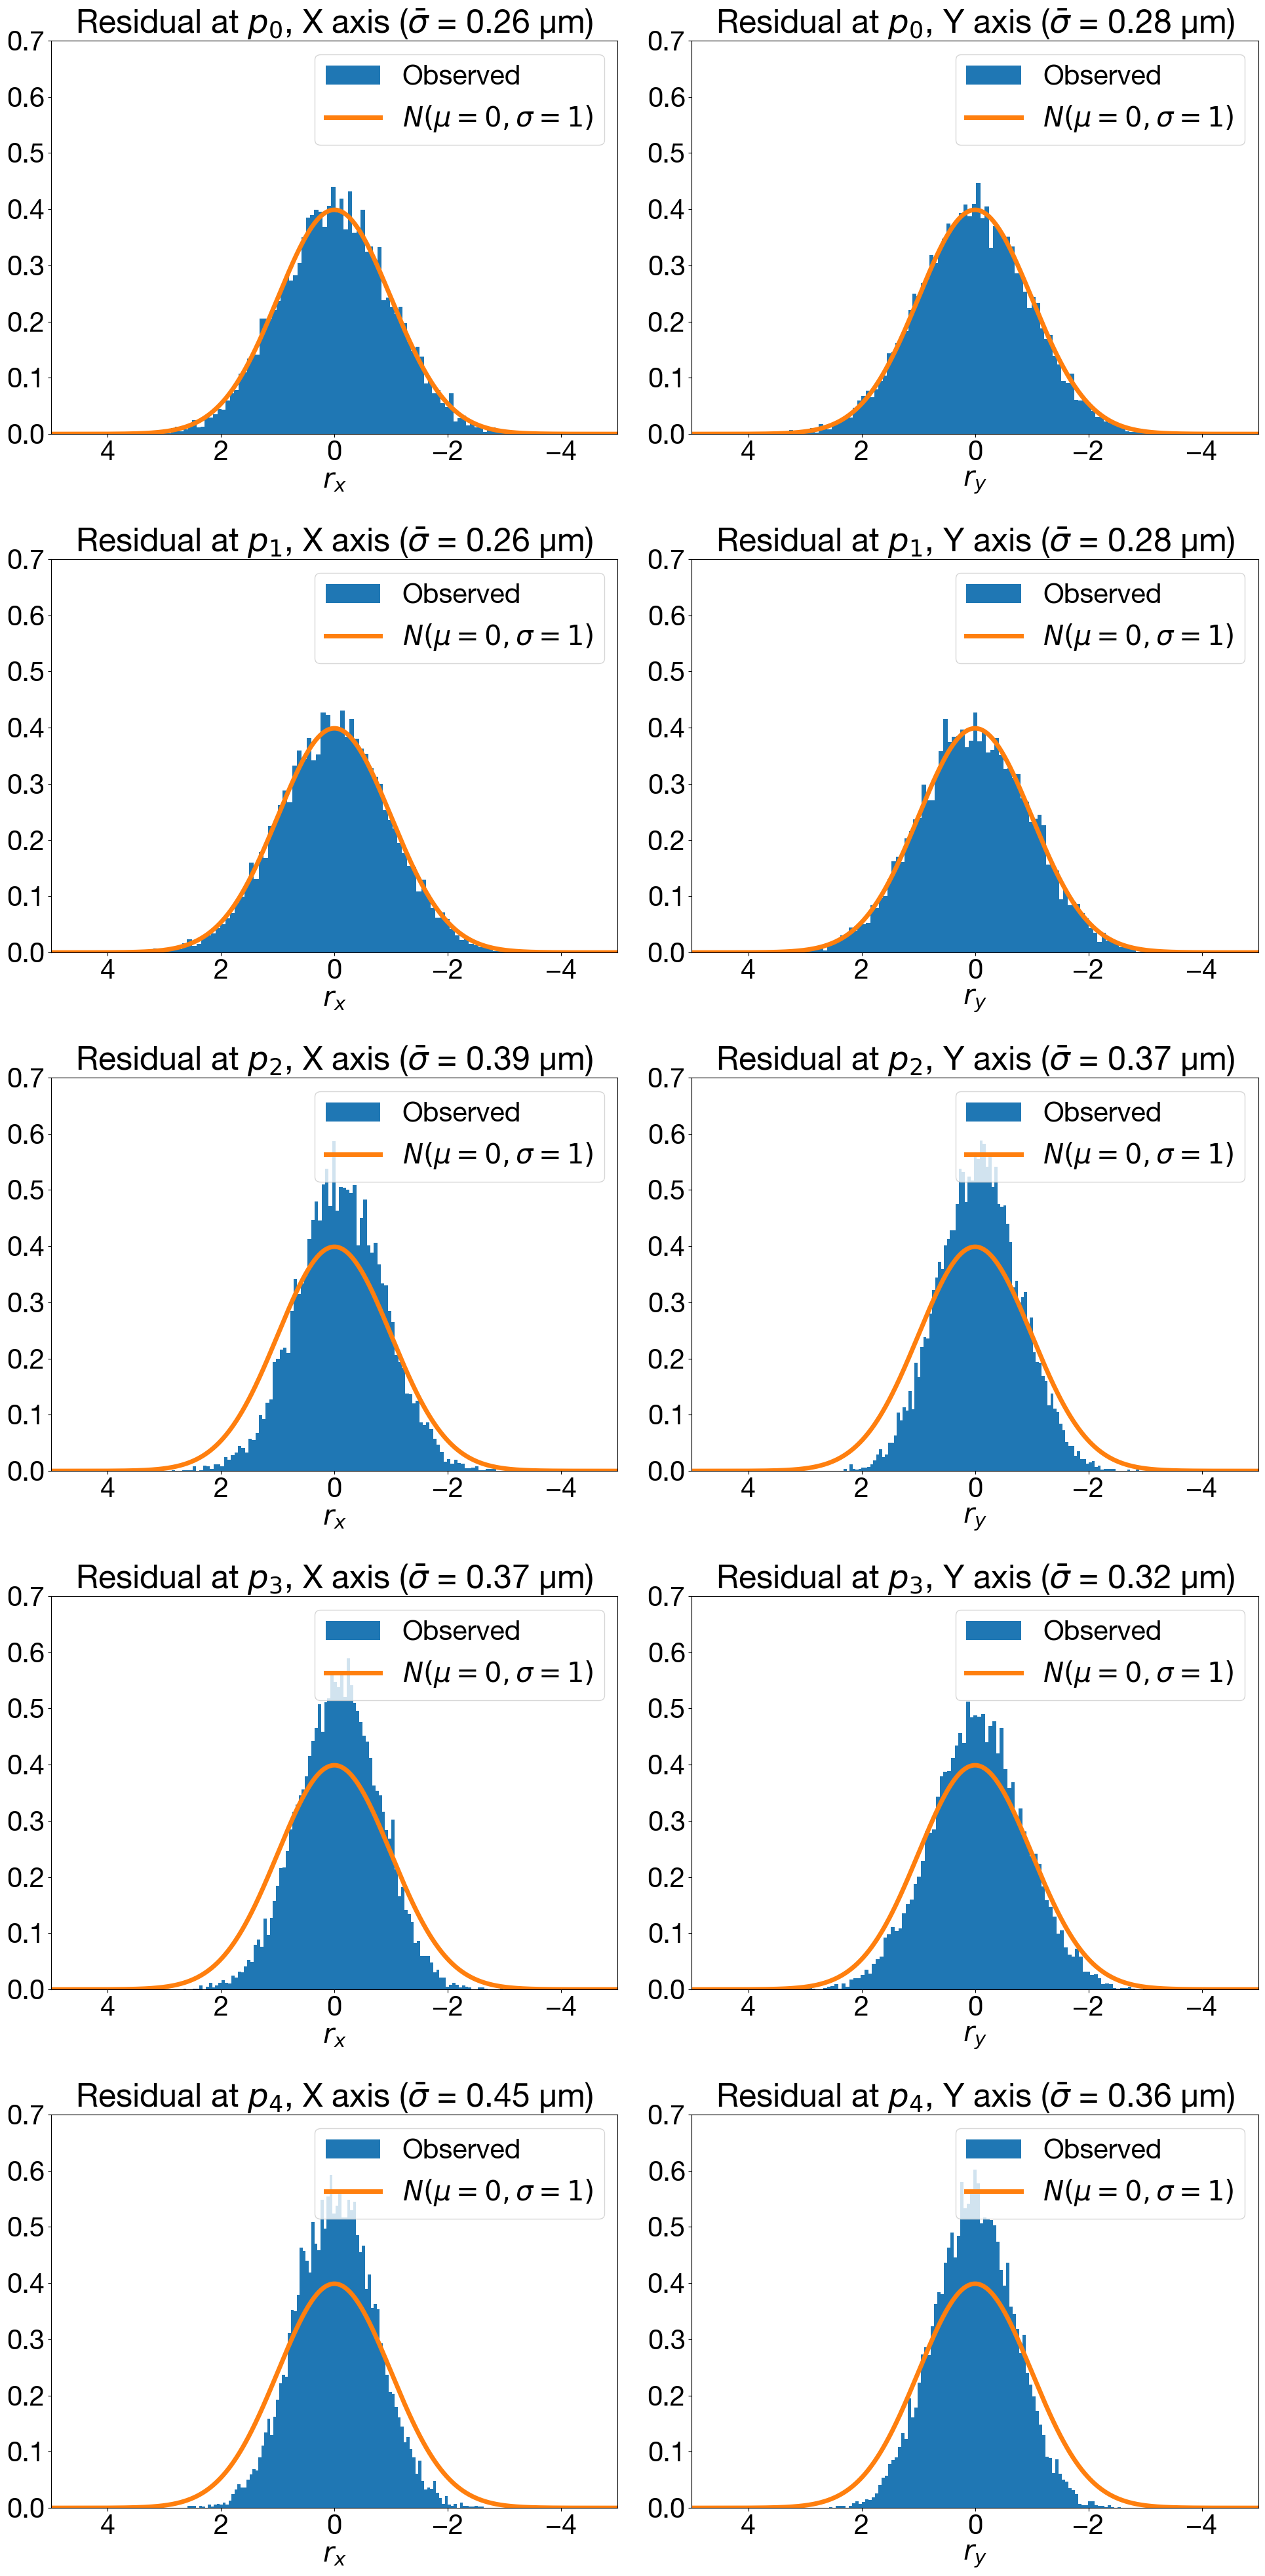

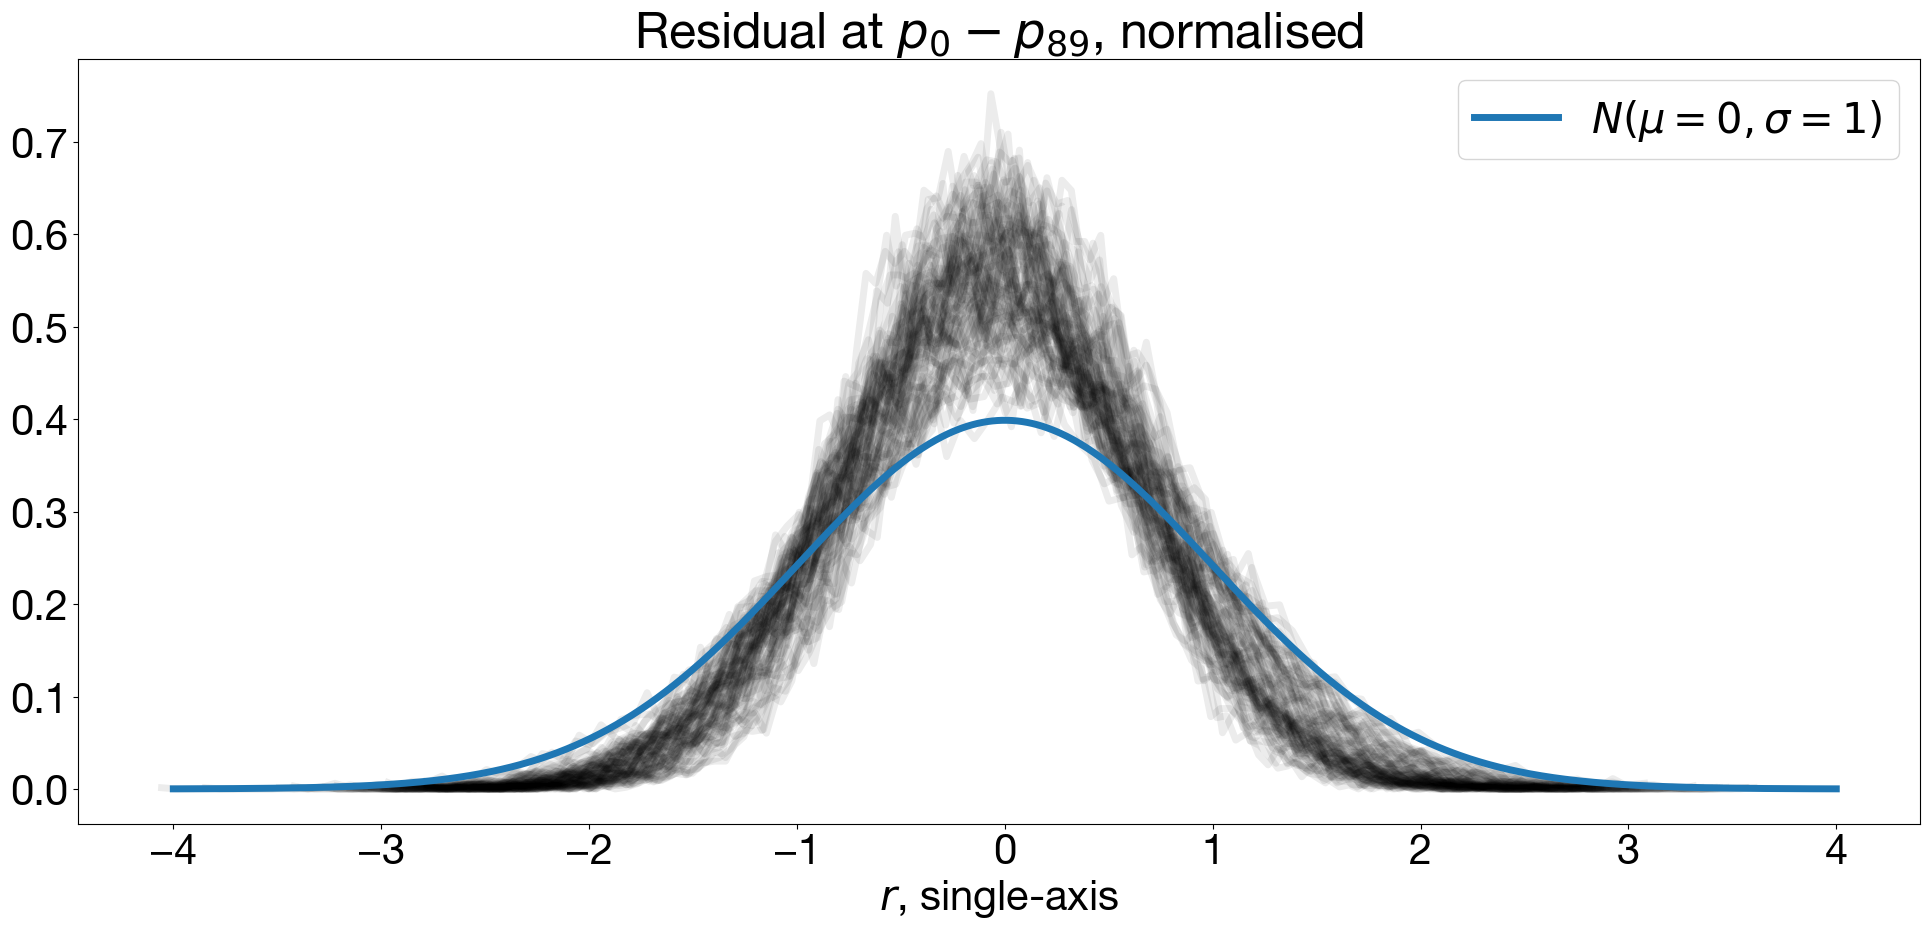

In [9]:
make_plots(L1)
plt.savefig('uncertainty_1.svg',bbox_inches='tight')
make_overlay(L1)
plt.savefig('histograms_1.svg',bbox_inches='tight')

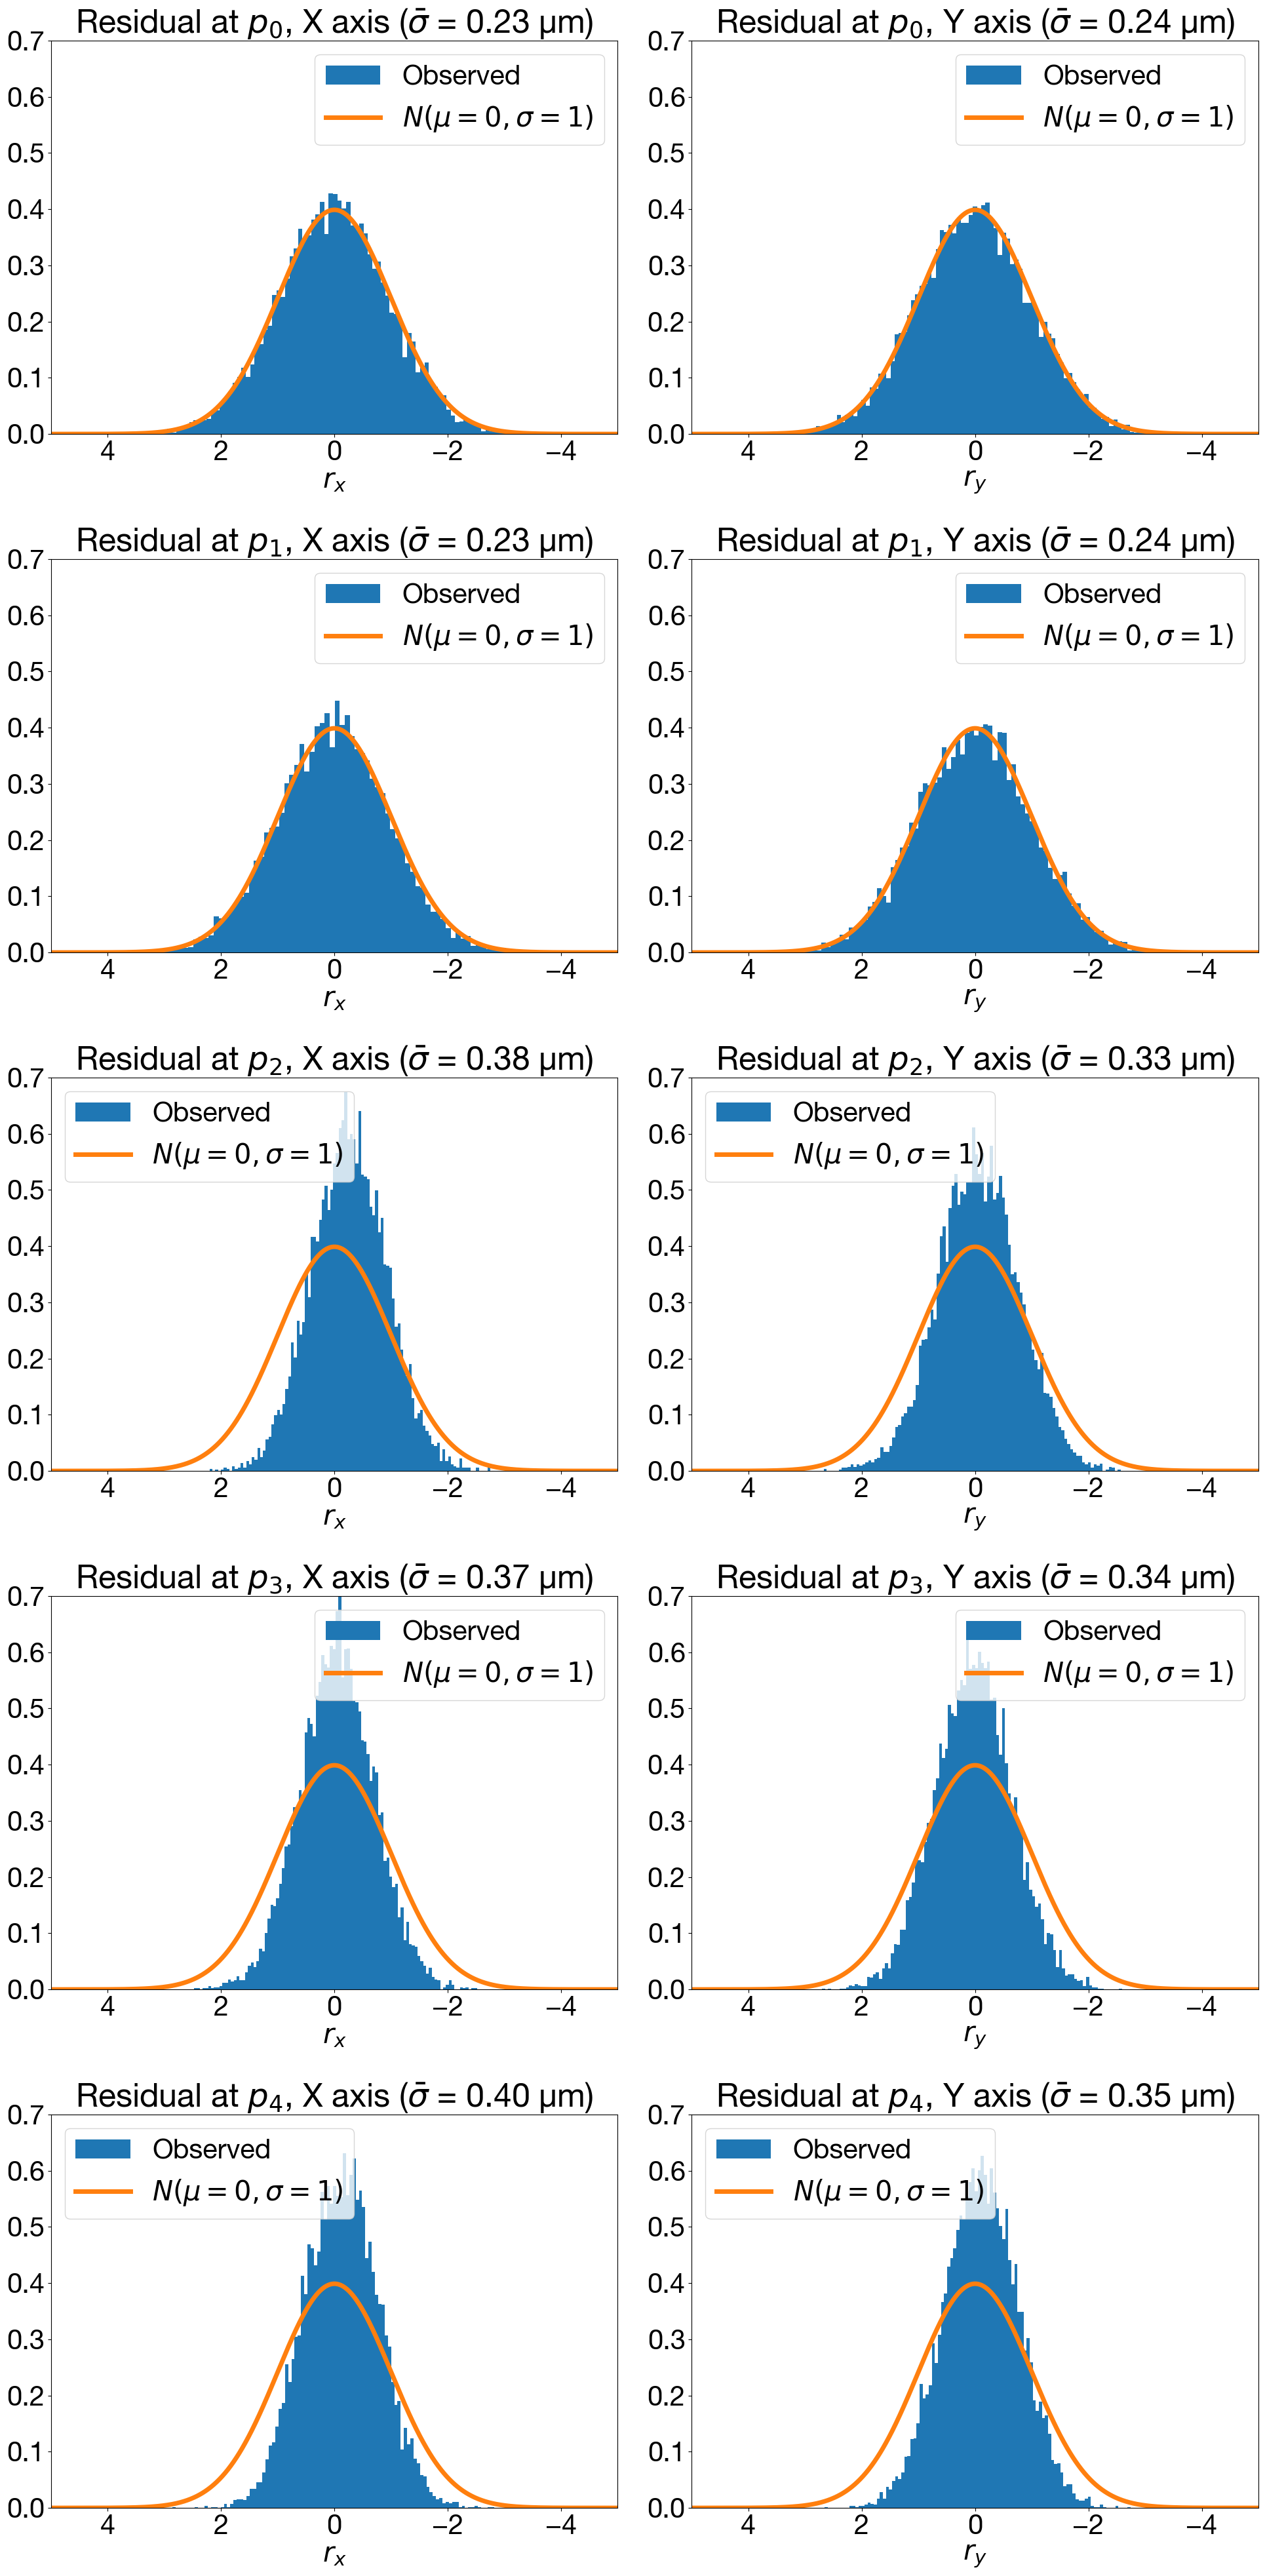

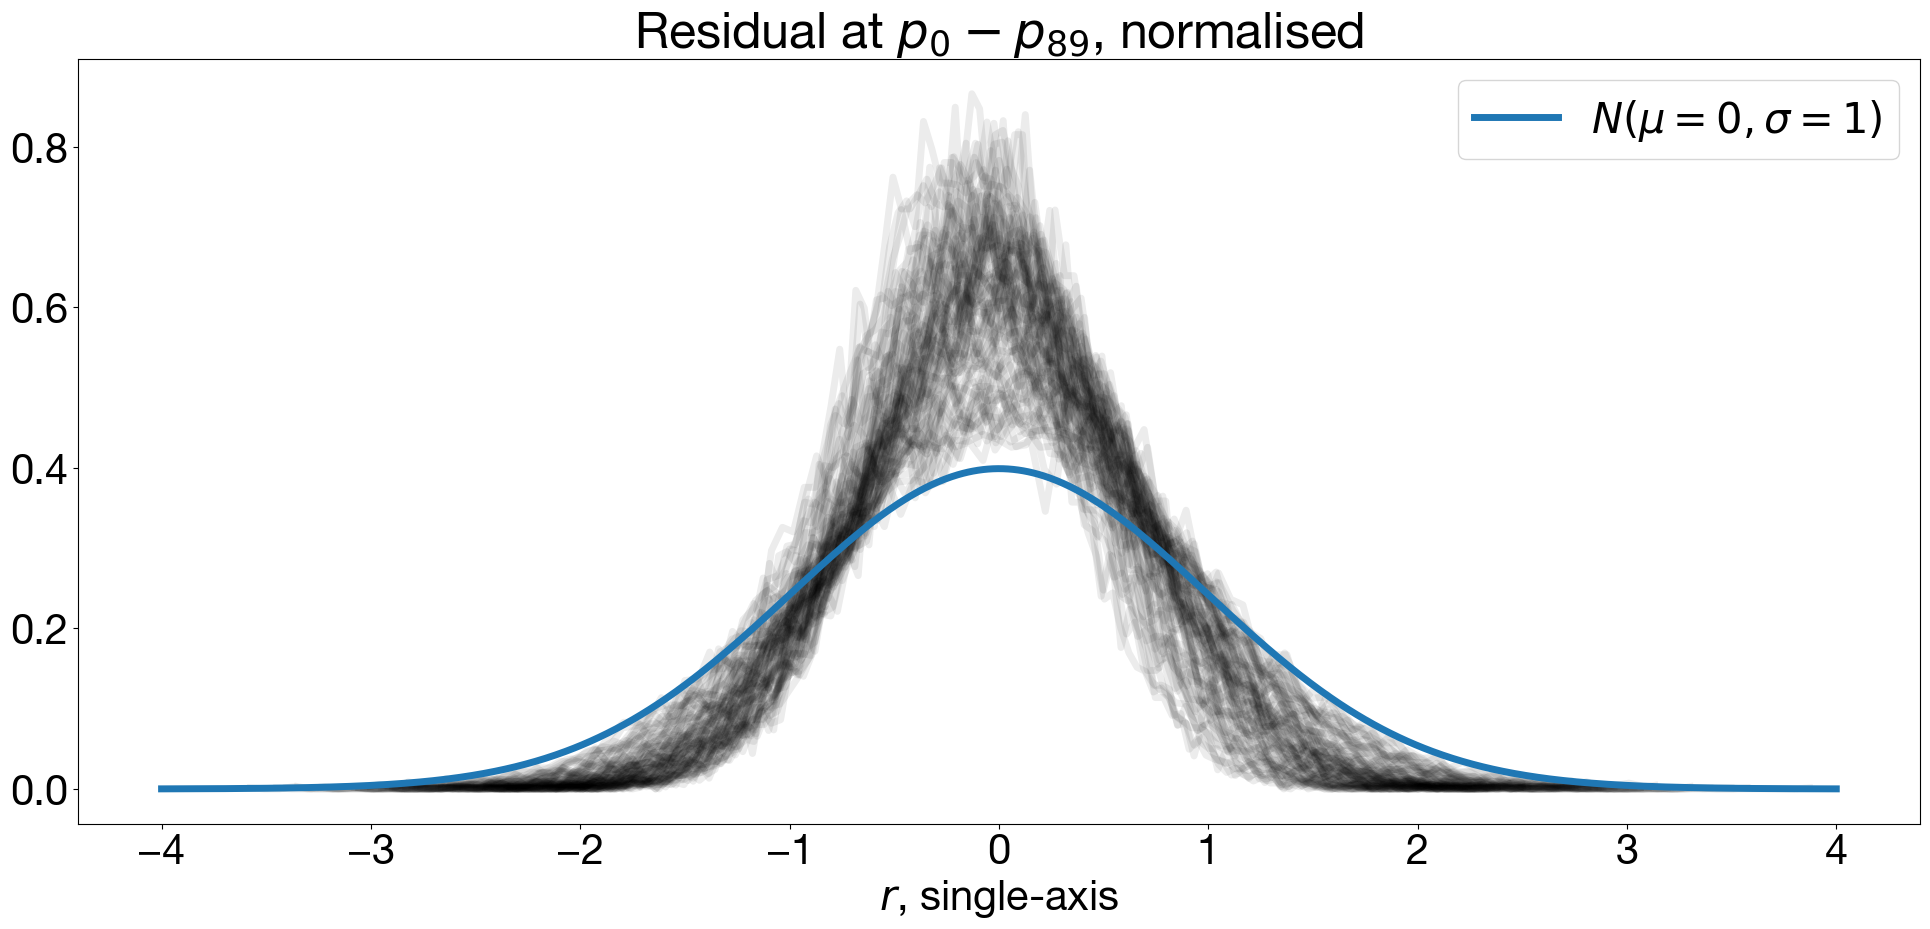

In [10]:
make_plots(L2)
plt.savefig('uncertainty_2.svg',bbox_inches='tight')
make_overlay(L2)
plt.savefig('histograms_2.svg',bbox_inches='tight')